In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from scipy import stats

In [2]:
df_pop = pd.read_csv("projected-population-by-country.csv")
df_water_safety = pd.read_excel("Data.xlsx")
df_continents = pd.read_excel("Continents.xlsx")
#df_gdp_capita = pd.read_csv("gdp-per-capita-worldbank.csv")

In [3]:
df_pop.head()

,Entity,Code,Year,Population (historical estimates and future projections)
0,Afghanistan,AFG,-10000,14737
1,Afghanistan,AFG,-9000,20405
2,Afghanistan,AFG,-8000,28253
3,Afghanistan,AFG,-7000,39120
4,Afghanistan,AFG,-6000,54166


In [4]:
df_water_safety.head()

,Entity,Code,Year,wat_sm,wat_bas_minus_sm,wat_lim,wat_unimp,wat_sur
0,Afghanistan,AFG,2000,10.927531,17.243884,3.660638,43.178306,24.989641
1,Afghanistan,AFG,2001,10.938792,17.260574,3.661542,43.167542,24.971550
2,Afghanistan,AFG,2002,11.725373,18.511012,3.949472,41.689620,24.124524
3,Afghanistan,AFG,2003,12.512121,19.761601,4.237154,40.210931,23.278193
4,Afghanistan,AFG,2004,13.305995,21.022564,4.524914,38.724280,22.422247


In [5]:
df_continents.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [6]:
#Merge dataframes together
df = df_water_safety.merge(df_pop,on=['Entity','Year'])
df.head()

,Entity,Code_x,Year,wat_sm,wat_bas_minus_sm,wat_lim,wat_unimp,wat_sur,Code_y,Population (historical estimates and future projections)
0,Afghanistan,AFG,2000,10.927531,17.243884,3.660638,43.178306,24.989641,AFG,20779957
1,Afghanistan,AFG,2001,10.938792,17.260574,3.661542,43.167542,24.971550,AFG,21606992
2,Afghanistan,AFG,2002,11.725373,18.511012,3.949472,41.689620,24.124524,AFG,22600774
3,Afghanistan,AFG,2003,12.512121,19.761601,4.237154,40.210931,23.278193,AFG,23680871
4,Afghanistan,AFG,2004,13.305995,21.022564,4.524914,38.724280,22.422247,AFG,24726689


In [7]:
removed_entities = [i for i in df_pop.Entity.unique() if i not in df.Entity.unique()]
removed_entities

['Africa',
 'Asia',
 'Bonaire Sint Eustatius and Saba',
 'Europe',
 'Micronesia (country)',
 'North America',
 'Saint Barthlemy',
 'South America',
 'Svalbard and Jan Mayen',
 'Taiwan',
 'Vatican',
 'Wallis and Futuna',
 'Western Sahara']

In [8]:
df.shape

(4692, 10)

In [9]:
df = df.merge(df_continents,left_on=['Code_x'],right_on=['alpha-3'])
df.head()

,Entity,Code_x,Year,wat_sm,wat_bas_minus_sm,wat_lim,wat_unimp,wat_sur,Code_y,Population (historical estimates and future projections),...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AFG,2000,10.927531,17.243884,3.660638,43.178306,24.989641,AFG,20779957,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Afghanistan,AFG,2001,10.938792,17.260574,3.661542,43.167542,24.971550,AFG,21606992,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
2,Afghanistan,AFG,2002,11.725373,18.511012,3.949472,41.689620,24.124524,AFG,22600774,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
3,Afghanistan,AFG,2003,12.512121,19.761601,4.237154,40.210931,23.278193,AFG,23680871,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
4,Afghanistan,AFG,2004,13.305995,21.022564,4.524914,38.724280,22.422247,AFG,24726689,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN


In [10]:
df.shape

(4635, 21)

In [11]:
df.columns

Index(['Entity', 'Code_x', 'Year', 'wat_sm', 'wat_bas_minus_sm', 'wat_lim',
       'wat_unimp', 'wat_sur', 'Code_y',
       'Population (historical estimates and future projections)', 'name',
       'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
      dtype='object')

In [12]:
#drop Code from dataframes
df = df.drop(['Code_y',
              'name',
              'alpha-2',
              'alpha-3',
              'country-code',
              'iso_3166-2',
              'region-code',
              'sub-region-code',
              'intermediate-region-code',
              'intermediate-region'],axis=1)
df.head()

,Entity,Code_x,Year,wat_sm,wat_bas_minus_sm,wat_lim,wat_unimp,wat_sur,Population (historical estimates and future projections),region,sub-region
0,Afghanistan,AFG,2000,10.927531,17.243884,3.660638,43.178306,24.989641,20779957,Asia,Southern Asia
1,Afghanistan,AFG,2001,10.938792,17.260574,3.661542,43.167542,24.971550,21606992,Asia,Southern Asia
2,Afghanistan,AFG,2002,11.725373,18.511012,3.949472,41.689620,24.124524,22600774,Asia,Southern Asia
3,Afghanistan,AFG,2003,12.512121,19.761601,4.237154,40.210931,23.278193,23680871,Asia,Southern Asia
4,Afghanistan,AFG,2004,13.305995,21.022564,4.524914,38.724280,22.422247,24726689,Asia,Southern Asia


In [13]:
new_columns = {"Entity": "Country",
               "wat_sm": "Safe management",
               "wat_bas_minus_sm":"Basic management",
               "wat_lim":"Limited management",
               "wat_unimp":"Unimproved management",
               "wat_sur":"Surface water only",
               "Code_x": "Alpha",
               "region":"Continent",
               "sub-region":"Subregion",
               "Population (historical estimates and future projections)":"Population"}

df = df.rename(columns=new_columns)
df.head()

,Country,Alpha,Year,Safe management,Basic management,Limited management,Unimproved management,Surface water only,Population,Continent,Subregion
0,Afghanistan,AFG,2000,10.927531,17.243884,3.660638,43.178306,24.989641,20779957,Asia,Southern Asia
1,Afghanistan,AFG,2001,10.938792,17.260574,3.661542,43.167542,24.971550,21606992,Asia,Southern Asia
2,Afghanistan,AFG,2002,11.725373,18.511012,3.949472,41.689620,24.124524,22600774,Asia,Southern Asia
3,Afghanistan,AFG,2003,12.512121,19.761601,4.237154,40.210931,23.278193,23680871,Asia,Southern Asia
4,Afghanistan,AFG,2004,13.305995,21.022564,4.524914,38.724280,22.422247,24726689,Asia,Southern Asia


## Start plotting

In [14]:
#Grouping makes our population irrelevant, can drop and remerge
group_continent = df.groupby(["Continent","Year"]).mean().reset_index()
group_continent = group_continent.drop("Population",axis=1)

In [15]:
#Make Americas one group in population:
grouped_americas = df_pop[df_pop['Entity'].isin(["North America","South America"])].groupby(['Entity','Year']).sum()
grouped_americas = grouped_americas.reset_index().groupby("Year").sum().reset_index().reindex()
grouped_americas['Entity'] = "Americas"
grouped_americas.head()

,Year,Population (historical estimates and future projections),Entity
0,-10000,2277035,Americas
1,-9000,2763483,Americas
2,-8000,3367583,Americas
3,-7000,4119812,Americas
4,-6000,5058952,Americas


In [16]:
#Add Americas to df_pop - only do this once
df_pop = pd.concat([df_pop,grouped_americas]).reset_index(drop=True)

In [17]:
#Remerge population data
group_continent = group_continent.merge(df_pop,how='left', left_on=["Continent","Year"],right_on=['Entity','Year'])
group_continent = group_continent.drop(["Entity","Code"],axis=1)
#Remerge 
group_continent.head()

,Continent,Year,Safe management,Basic management,Limited management,Unimproved management,Surface water only,Population (historical estimates and future projections)
0,Africa,2000,25.001877,32.097824,8.535057,21.198623,11.571935,810984230
1,Africa,2001,25.385696,32.265936,8.685644,20.740039,11.273450,830902539
2,Africa,2002,28.534754,31.474675,8.691921,19.947027,10.726498,851298437
3,Africa,2003,28.928881,31.643245,8.854582,19.508066,10.388211,872248336
4,Africa,2004,29.383877,31.772059,9.016362,18.979089,9.939519,893842786


In [18]:
#New column for population change year on year
population_diff = group_continent.groupby("Continent")['Population (historical estimates and future projections)'].diff().values
population_diff = pd.Series(population_diff).fillna(0)
group_continent["Population change"] = population_diff

In [19]:
group_continent.head()

,Continent,Year,Safe management,Basic management,Limited management,Unimproved management,Surface water only,Population (historical estimates and future projections),Population change
0,Africa,2000,25.001877,32.097824,8.535057,21.198623,11.571935,810984230,0.0
1,Africa,2001,25.385696,32.265936,8.685644,20.740039,11.273450,830902539,19918309.0
2,Africa,2002,28.534754,31.474675,8.691921,19.947027,10.726498,851298437,20395898.0
3,Africa,2003,28.928881,31.643245,8.854582,19.508066,10.388211,872248336,20949899.0
4,Africa,2004,29.383877,31.772059,9.016362,18.979089,9.939519,893842786,21594450.0


In [20]:
group_continent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Continent                                                 105 non-null    object 
 1   Year                                                      105 non-null    int64  
 2   Safe management                                           105 non-null    float64
 3   Basic management                                          105 non-null    float64
 4   Limited management                                        105 non-null    float64
 5   Unimproved management                                     105 non-null    float64
 6   Surface water only                                        105 non-null    float64
 7   Population (historical estimates and future projections)  105 non-null    int64  
 8   Population change    

I plan to construct a sorted stream graph, inspired by examples here: https://datavizproject.com/data-type/sorted-stream-graph/

* X Axis: Year
* Y Axis: Proportion of safetly managed water
* Width: Population (share)
* Color: Continent/Subregion

Code examples: https://www.python-graph-gallery.com/streamchart-basic-matplotlib

In [21]:
#Function to calculate population growth
def population_growth():
    new_column = pd.Series(dtype="float")
    for i in group_continent.Continent.unique():
        continent_list = []
        sorted_continent = group_continent[group_continent.Continent.isin([i])].reset_index(drop=True)
        pop_change = sorted_continent["Population change"]
        pop_yearstart = sorted_continent["Population (historical estimates and future projections)"]
        for j in range(len(pop_change)):
            if j==0:
                continent_list.append(0)
            else:
                continent_list.append(pop_change[j]/pop_yearstart[j-1])
        new_column = new_column.append(pd.Series(continent_list))
    return (new_column)

In [22]:
#create new population growth column - only run once
group_continent["Population growth"] = population_growth().reset_index(drop=True)
group_continent.head()

,Continent,Year,Safe management,Basic management,Limited management,Unimproved management,Surface water only,Population (historical estimates and future projections),Population change,Population growth
0,Africa,2000,25.001877,32.097824,8.535057,21.198623,11.571935,810984230,0.0,0.000000
1,Africa,2001,25.385696,32.265936,8.685644,20.740039,11.273450,830902539,19918309.0,0.024561
2,Africa,2002,28.534754,31.474675,8.691921,19.947027,10.726498,851298437,20395898.0,0.024547
3,Africa,2003,28.928881,31.643245,8.854582,19.508066,10.388211,872248336,20949899.0,0.024609
4,Africa,2004,29.383877,31.772059,9.016362,18.979089,9.939519,893842786,21594450.0,0.024757


In [23]:
#Function to calculate proportion of population
def population_proportion():
    new_column = pd.Series(dtype="float")
    for i in group_continent.Continent.unique():
        continent_list = []
        sorted_continent = group_continent[group_continent.Continent.isin([i])].reset_index(drop=True)
        pop_year = group_continent.groupby("Year")['Population (historical estimates and future projections)'].sum().values
        pop_cont = sorted_continent["Population (historical estimates and future projections)"]
        for j in range(len(pop_year)):
                continent_list.append(pop_cont[j]/pop_year[j])
        new_column = new_column.append(pd.Series(continent_list))
    return (new_column)

In [24]:
group_continent["Population proportion"] = population_proportion().reset_index(drop=True)
group_continent.head()

,Continent,Year,Safe management,Basic management,Limited management,Unimproved management,Surface water only,Population (historical estimates and future projections),Population change,Population growth,Population proportion
0,Africa,2000,25.001877,32.097824,8.535057,21.198623,11.571935,810984230,0.0,0.000000,0.132001
1,Africa,2001,25.385696,32.265936,8.685644,20.740039,11.273450,830902539,19918309.0,0.024561,0.133523
2,Africa,2002,28.534754,31.474675,8.691921,19.947027,10.726498,851298437,20395898.0,0.024547,0.135083
3,Africa,2003,28.928881,31.643245,8.854582,19.508066,10.388211,872248336,20949899.0,0.024609,0.136685
4,Africa,2004,29.383877,31.772059,9.016362,18.979089,9.939519,893842786,21594450.0,0.024757,0.138335


In [25]:
group_continent[group_continent["Year"] == 2020]

,Continent,Year,Safe management,Basic management,Limited management,Unimproved management,Surface water only,Population (historical estimates and future projections),Population change,Population growth,Population proportion
20,Africa,2020,39.135960,32.528088,11.647493,11.677793,4.927305,1340598111,32533935.0,0.024872,0.171986
41,Americas,2020,80.395889,16.782693,0.794267,2.391680,0.642869,1022822090,8110044.0,0.007992,0.131219
62,Asia,2020,71.593441,22.767263,2.208320,2.429637,1.423531,4639847425,39674734.0,0.008625,0.595250
83,Europe,2020,94.214691,4.684670,0.538077,0.529356,0.008946,748843405,462016.0,0.000617,0.096070
104,Oceania,2020,76.736153,19.989523,1.516843,3.402403,2.205474,42677809,549761.0,0.013050,0.005475


## Create plot

In [26]:
def get_continent_vals(continent):
    continent_vals = group_continent[group_continent.Continent.isin([continent])]
    continent_years = continent_vals['Year'].values
    continent_water = continent_vals['Safe management'].values
    continent_population = continent_vals['Population proportion'].values
    return continent_years,continent_water,continent_population

In [27]:
from scipy.interpolate import interp1d

/var/folders/dw/x3jt2hbs215_s0l14rz0df6h0000gn/T/ipykernel_8856/2769294564.py:48: RankWarning: Polyfit may be poorly conditioned
  windline()


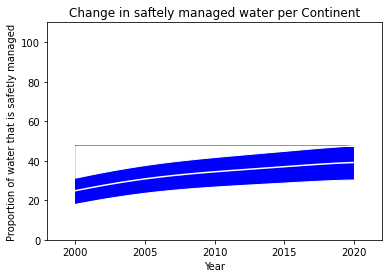

/var/folders/dw/x3jt2hbs215_s0l14rz0df6h0000gn/T/ipykernel_8856/2769294564.py:48: RankWarning: Polyfit may be poorly conditioned
  windline()


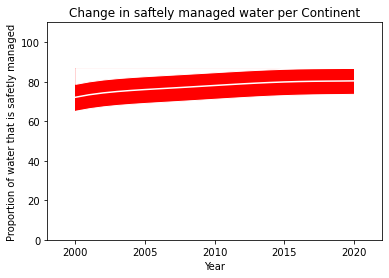

/var/folders/dw/x3jt2hbs215_s0l14rz0df6h0000gn/T/ipykernel_8856/2769294564.py:48: RankWarning: Polyfit may be poorly conditioned
  windline()


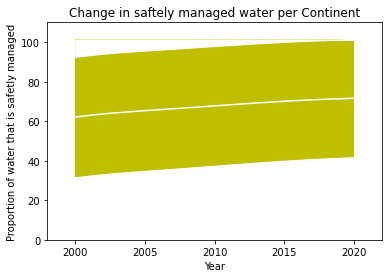

/var/folders/dw/x3jt2hbs215_s0l14rz0df6h0000gn/T/ipykernel_8856/2769294564.py:48: RankWarning: Polyfit may be poorly conditioned
  windline()


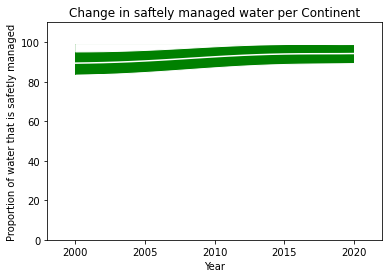

/var/folders/dw/x3jt2hbs215_s0l14rz0df6h0000gn/T/ipykernel_8856/2769294564.py:48: RankWarning: Polyfit may be poorly conditioned
  windline()


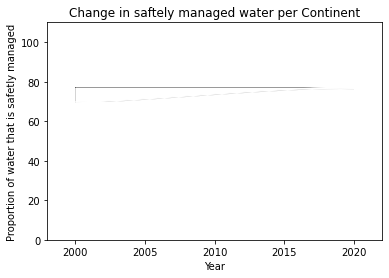

In [28]:
def windline():
    '''
    Input: None
    Process: Get vals from dataframe and plot vals
    Output: Plots of water safety
    '''
    colors = ["b","r","y","g","k"]
    count = 0
    for i in group_continent.Continent.unique():
        x,y,deviation = get_continent_vals(i)
        
        #add one to deviatio, so that growth may be negative
        #deviation = (deviation**10)/2
        #smooth y values
        poly = np.polyfit(x,y,10)
        poly_y = np.poly1d(poly)(x)
        
        #colours
        co = np.random.randint(2000, 2020, 21)
        c = interp1d(np.arange(0,21, 1), co, kind='cubic',fill_value="extrapolate")(x)
        #vals
        y1 = poly_y-(deviation*50)
        y2 = poly_y+(deviation*50)
        #tol = (y2.max()-y1.min())*0.05
        X, Y = np.meshgrid(np.linspace(x.min(), x.max(), 21), np.linspace(y1.min(), y2.max(), 21))
        Z = X.copy()
        for i in range(Z.shape[0]):
            Z[i,:] = c
        #Start plotting
        plt.contourf(X, Y, Z,colors=colors[count])
        plt.fill_between(x, y2, y2=np.ones(x.shape)*(y2.max()), color='w')
        plt.fill_between(x, np.ones(x.shape) * (y1.min()), y2=y1, color='w')
        plt.plot(x,poly_y,c="w")
        plt.xlim(1998,2022)
        plt.ylim(0, 110)
        plt.yscale("linear")
        
        plt.title("Change in saftely managed water per Continent")
        plt.xlabel("Year")
        plt.ylabel("Proportion of water that is safetly managed")
        
        save_string = "SafeWater{}.svg".format(count)
        
        plt.savefig(save_string)
        plt.show()
        
        count += 1
windline()

## Now map where water is safest

Here we will use the following packages:
* cartopy
* geopandas
* matplotlib.pyplot

We will use data from Ourworldindata.org of share of deaths due to unsafe water

In [29]:
import geopandas

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
from cartopy.io import shapereader
from cartopy.feature import ShapelyFeature

In [30]:
#We will work with the main dataframe
df_water_deaths = pd.read_csv("share-deaths-unsafe-water.csv")
df2 = df_water_deaths.merge(df_continents,left_on="Code",right_on="alpha-3")
df2 = df2.drop(['name',
              'alpha-2',
              'alpha-3',
              'country-code',
              'iso_3166-2',
              'region-code',
              'sub-region-code',
              'intermediate-region-code',
              'intermediate-region'],axis=1)
df2_new_columns = {"Entity": "Country",
               "Unsafe water source (IHME, 2019)": "Deaths due to water",
               "region":"Continent",
               "sub-region":"Subregion"}

df2 = df2.rename(columns=df2_new_columns)
df2.head()

,Country,Code,Year,Deaths due to water,Continent,Subregion
0,Afghanistan,AFG,1990,3.85,Asia,Southern Asia
1,Afghanistan,AFG,1991,3.68,Asia,Southern Asia
2,Afghanistan,AFG,1992,3.66,Asia,Southern Asia
3,Afghanistan,AFG,1993,4.34,Asia,Southern Asia
4,Afghanistan,AFG,1994,4.38,Asia,Southern Asia


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5404 entries, 0 to 5403
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              5404 non-null   object 
 1   Code                 5404 non-null   object 
 2   Year                 5404 non-null   int64  
 3   Deaths due to water  5404 non-null   float64
 4   Continent            5404 non-null   object 
 5   Subregion            5404 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 295.5+ KB


In [32]:
'''#Convert year variable to datetime
df2.Year = pd.to_datetime(df2.Year,format="%Y")
df2'''

'#Convert year variable to datetime\ndf2.Year = pd.to_datetime(df2.Year,format="%Y")\ndf2'

In [33]:
#read new geojson file to plot cloropleth map
#Source:https://geojson-maps.ash.ms/
geo_df = geopandas.read_file("custom.geo.json")

In [34]:
geo_df.head()

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry
0,3,Admin-0 country,5,Netherlands,NL1,1,2,Country,Aruba,ABW,...,Americas,Caribbean,Latin America & Caribbean,5,5,5,4,-99,ABW.geojson,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,3,Admin-0 country,6,Antigua and Barbuda,ATG,0,2,Sovereign country,Antigua and Barbuda,ATG,...,Americas,Caribbean,Latin America & Caribbean,17,19,6,4,1,ATG.geojson,"MULTIPOLYGON (((-61.77302 17.12653, -61.75642 ..."
2,3,Admin-0 country,6,United Kingdom,GB1,1,2,Dependency,Anguilla,AIA,...,Americas,Caribbean,Latin America & Caribbean,8,8,4,-99,-99,AIA.geojson,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
3,6,Admin-0 country,6,France,FR1,1,2,Dependency,Saint Barthelemy,BLM,...,Americas,Caribbean,Latin America & Caribbean,13,16,6,4,-99,BLM.geojson,"POLYGON ((-62.83886 17.88198, -62.85094 17.890..."
4,0,Admin-0 country,6,Belize,BLZ,0,2,Sovereign country,Belize,BLZ,...,Americas,Central America,Latin America & Caribbean,6,6,6,-99,1,BLZ.geojson,"MULTIPOLYGON (((-87.80370 17.31599, -87.80358 ..."


In [36]:
geo_df.columns

Index(['scalerank', 'featurecla', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'admin', 'adm0_a3', 'geou_dif', 'geounit',
       'gu_a3', 'su_dif', 'subunit', 'su_a3', 'brk_diff', 'name', 'name_long',
       'brk_a3', 'brk_name', 'brk_group', 'abbrev', 'postal', 'formal_en',
       'formal_fr', 'note_adm0', 'note_brk', 'name_sort', 'name_alt',
       'mapcolor7', 'mapcolor8', 'mapcolor9', 'mapcolor13', 'pop_est',
       'gdp_md_est', 'pop_year', 'lastcensus', 'gdp_year', 'economy',
       'income_grp', 'wikipedia', 'fips_10_', 'iso_a2', 'iso_a3', 'iso_n3',
       'un_a3', 'wb_a2', 'wb_a3', 'woe_id', 'woe_id_eh', 'woe_note',
       'adm0_a3_is', 'adm0_a3_us', 'adm0_a3_un', 'adm0_a3_wb', 'continent',
       'region_un', 'subregion', 'region_wb', 'name_len', 'long_len',
       'abbrev_len', 'tiny', 'homepart', 'filename', 'geometry'],
      dtype='object')

In [37]:
#After earlier checking which countries failed
#correct iso a3 vals for two countries
geo_df.loc[(geo_df.admin == 'France'),'iso_a3']='FRA'
geo_df.loc[(geo_df.admin == 'Norway'),'iso_a3']='NOR'

In [38]:
geo_df = geo_df.drop(['scalerank', 'featurecla', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'admin', 'geou_dif', 'geounit',
       'gu_a3', 'su_dif', 'subunit', 'su_a3', 'brk_diff', 'name', 'name_long',
       'brk_a3', 'brk_name', 'brk_group', 'abbrev', 'postal', 'formal_en',
       'formal_fr', 'note_adm0', 'note_brk', 'name_sort', 'name_alt',
       'mapcolor7', 'mapcolor8', 'mapcolor9', 'mapcolor13', 'pop_est',
       'gdp_md_est', 'pop_year', 'lastcensus', 'gdp_year', 'economy',
       'income_grp', 'wikipedia', 'iso_a2','adm0_a3', 'iso_n3', 'wb_a3',
       'un_a3', 'wb_a2', 'woe_id', 'adm0_a3_is', 'adm0_a3_us', 'woe_id_eh',
       'adm0_a3_un', 'adm0_a3_wb', 'continent', 'region_un', 'subregion',
       'region_wb', 'name_len', 'long_len', 'abbrev_len', 'tiny', 'homepart',
       'filename','fips_10_', 'woe_note'],axis=1)
geo_df.head()

,iso_a3,geometry
0,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,ATG,"MULTIPOLYGON (((-61.77302 17.12653, -61.75642 ..."
2,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
3,BLM,"POLYGON ((-62.83886 17.88198, -62.85094 17.890..."
4,BLZ,"MULTIPOLYGON (((-87.80370 17.31599, -87.80358 ..."


In [39]:
type(geo_df)

geopandas.geodataframe.GeoDataFrame

In [40]:
df2_new = df2.merge(geo_df,left_on="Code",right_on="iso_a3")
#df2_new = df2_new.drop(["adm0_a3"],axis=1)

In [41]:
#check how many rows were ommited and which Countries these are:
print (len(df2)-len(df2_new))
print ([i for i in df2.Country.unique() if i not in df2_new.Country.unique()])

84
['Maldives', 'Mauritius', 'Seychelles']


In [42]:
#These countries are small/island nations so in this case won't have much effect on our data
#even if four of these are part of Africa

#make df2_new new df2
df2 = df2_new

In [43]:
#Check type
type(df2)

pandas.core.frame.DataFrame

In [44]:
#Convert to geopandas dataframe to plot maps
df2 = geopandas.GeoDataFrame(df2)
type(df2)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

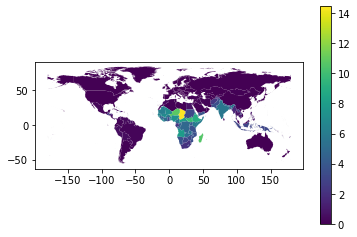

In [47]:
#df2_Africa with only 2017 (most recent data)
df2_2017 = df2[df2.Year==2017]
df2_2017.plot(column="Deaths due to water",
                   legend=True)

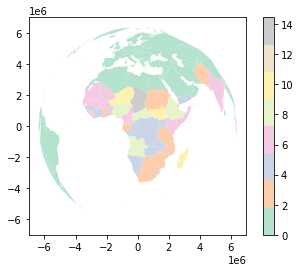

In [48]:
# Define the CartoPy CRS object.
crs = ccrs.Orthographic(18,globe=None)

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = df2_2017.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot(column="Deaths due to water",
                   legend=True,cmap="Pastel2")

plt.ylim(-7000000, 7000000)
plt.xlim(-7000000, 7000000)

plt.savefig("DeathsbyWater.svg")
plt.show()

In [49]:
df2_2017[df2_2017.Continent == "Africa"].sort_values(by="Deaths due to water")

,Country,Code,Year,Deaths due to water,Continent,Subregion,iso_a3,geometry
83,Algeria,DZA,2017,0.11,Africa,Northern Africa,DZA,"POLYGON ((8.60251 36.93951, 8.60566 36.91305, ..."
4899,Tunisia,TUN,2017,0.11,Africa,Northern Africa,TUN,"MULTIPOLYGON (((10.92994 33.89631, 10.95973 33..."
2827,Libya,LBY,2017,0.11,Africa,Northern Africa,LBY,"POLYGON ((19.29168 30.28705, 19.33855 30.29881..."
3219,Morocco,MAR,2017,0.32,Africa,Northern Africa,MAR,"POLYGON ((-5.40549 35.92652, -5.39932 35.92447..."
1511,Egypt,EGY,2017,0.63,Africa,Northern Africa,EGY,"MULTIPOLYGON (((34.00294 26.73163, 34.00359 26..."
951,Cape Verde,CPV,2017,0.80,Africa,Sub-Saharan Africa,CPV,"MULTIPOLYGON (((-24.68326 14.84247, -24.68688 ..."
4115,Sao Tome and Principe,STP,2017,1.24,Africa,Sub-Saharan Africa,STP,"MULTIPOLYGON (((6.61622 0.07811, 6.58286 0.077..."
4395,South Africa,ZAF,2017,2.04,Africa,Sub-Saharan Africa,ZAF,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -..."
1567,Equatorial Guinea,GNQ,2017,2.20,Africa,Sub-Saharan Africa,GNQ,"MULTIPOLYGON (((5.64275 -1.46282, 5.62892 -1.4..."
1791,Gabon,GAB,2017,2.27,Africa,Sub-Saharan Africa,GAB,"MULTIPOLYGON (((9.02101 -0.75555, 9.00660 -0.7..."


In [82]:
df2_2017[df2_2017.Continent == "Africa"].sort_values(by="Deaths due to water").describe()

,Year,Deaths due to water
count,52.0,52.000000
mean,2017.0,4.912692
std,0.0,2.934848
min,2017.0,0.110000
25%,2017.0,3.217500
50%,2017.0,4.720000
75%,2017.0,6.472500
max,2017.0,14.450000


In [72]:
df2_Chad = df2[df2.Country == "Chad"].sort_values(by="Year")
df2_SouthAfrica = df2[df2.Country == "South Africa"].sort_values(by="Year")
df2_Nigeria = df2[df2.Country == "Nigeria"].sort_values(by="Year")

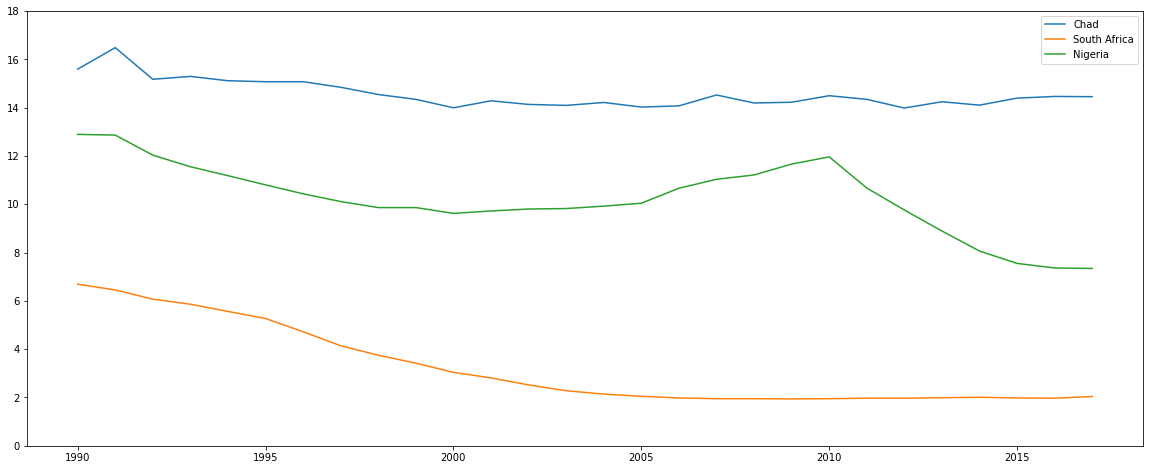

In [80]:
plt.figure(figsize=(20,8))

plt.plot(df2_Chad.Year,df2_Chad["Deaths due to water"],label="Chad")
plt.plot(df2_SouthAfrica.Year,df2_SouthAfrica["Deaths due to water"],label="South Africa")
plt.plot(df2_Nigeria.Year,df2_Nigeria["Deaths due to water"],label="Nigeria")

plt.ylim(0,18)

plt.legend()
plt.savefig("Lineplot comparison.svg")
plt.show()